In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('netflix_titles.csv', sep=',', )

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
latam_countries = [
    'Mexico', 'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru',
    'Uruguay', 'Paraguay', 'Bolivia', 'Ecuador', 'Venezuela',
    'Guatemala', 'Honduras', 'El Salvador', 'Nicaragua', 'Costa Rica',
    'Panama', 'Cuba', 'Dominican Republic', 'Puerto Rico'
]

In [ ]:
# Filtrar campo 'country' donde al menos uno de los países pertenece a LATAM
df_latam = df[df['country'].notna()]
df_latam = df_latam[df_latam['country'].apply(lambda x: any(country in x for country in latam_countries))]

print(f"Títulos en LATAM: {df_latam.shape[0]}")
df_latam.head()

Títulos en LATAM: 440


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
134,s135,Movie,Clear and Present Danger,Phillip Noyce,"Harrison Ford, Willem Dafoe, Anne Archer, Joaq...","United States, Mexico","September 1, 2021",1994,PG-13,142 min,"Action & Adventure, Dramas","When the president's friend is murdered, CIA D..."
140,s141,Movie,"El patrón, radiografía de un crimen",Sebastián Schindel,"Joaquín Furriel, Luis Ziembrowski, Guillermo P...","Argentina, Venezuela","September 1, 2021",2014,TV-MA,100 min,"Dramas, International Movies, Thrillers",A lawyer defends an illiterate man whose explo...
270,s271,Movie,Beckett,Ferdinando Cito Filomarino,"John David Washington, Boyd Holbrook, Alicia V...","Italy, Brazil, Greece","August 13, 2021",2021,TV-MA,110 min,Action & Adventure,An American tourist goes on the run in Greece ...
275,s276,TV Show,The Kingdom,NaN,"Chino Darín, Nancy Dupláa, Joaquín Furriel, Pe...",Argentina,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","After his running mate's murder, a controversi..."


In [ ]:
# Separación de países dado que existen registros con múltiples países
country_counts = Counter()
for countries in df_latam['country'].dropna():
    for country in countries.split(', '):
        if country in latam_countries:
            country_counts[country] += 1

In [ ]:
# Aplicarlo en dataframe
latam_country_df = pd.DataFrame.from_dict(country_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

In [ ]:
latam_country_df

,count
Mexico,169
Brazil,97
Argentina,91
Colombia,52
Chile,29
Uruguay,14
Peru,10
Venezuela,4
Guatemala,2
Puerto Rico,1


<ipython-input-24-9de548c9879e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=latam_country_df['count'], y=latam_country_df.index, palette="magma")


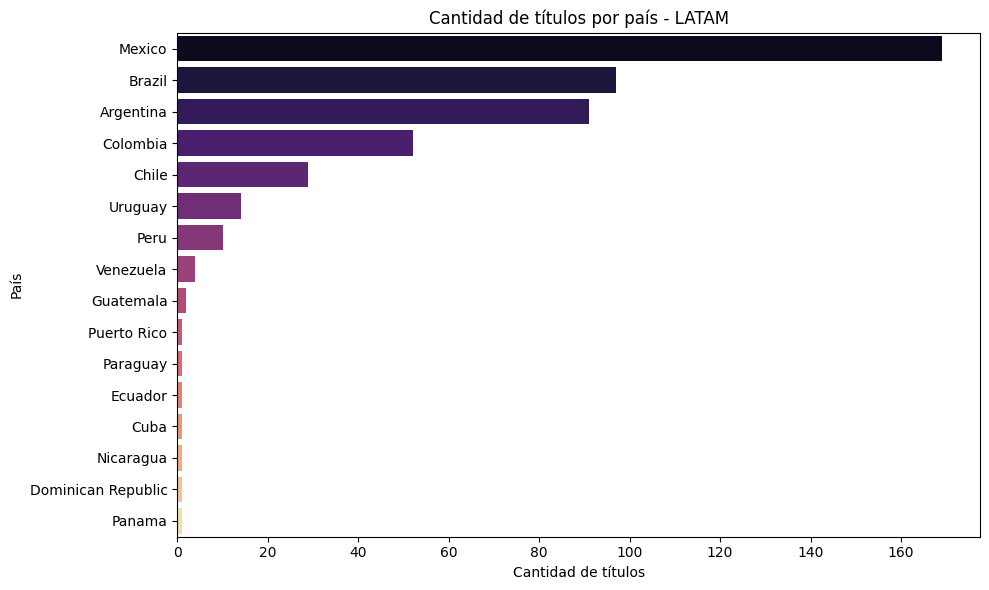

In [ ]:
# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=latam_country_df['count'], y=latam_country_df.index, palette="magma")
plt.title('Cantidad de títulos por país - LATAM')
plt.xlabel('Cantidad de títulos')
plt.ylabel('País')
plt.tight_layout()
plt.show()

In [ ]:
# Conteo de películas vs series
type_counts = df_latam['type'].value_counts()

type_counts


,count
type,
Movie,299
TV Show,141


<ipython-input-28-8acd6b40efdf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


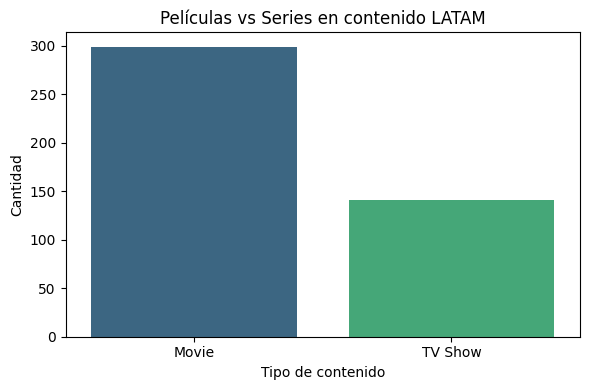

In [ ]:
# Gráfico
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Películas vs Series en contenido LATAM')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de contenido')
plt.tight_layout()
plt.show()

In [ ]:
# Conversión de formato de fechas
df_latam['date_added'] = pd.to_datetime(df_latam['date_added'], errors='coerce')

In [ ]:
# Creación de  nueva columna con el año en que se añadió a Netflix
df_latam['year_added'] = df_latam['date_added'].dt.year

In [ ]:
# Agrupar por año
year_counts = df_latam.groupby('year_added').size()
year_counts

,0
year_added,
2011.0,1
2012.0,1
2014.0,1
2015.0,1
2016.0,20
2017.0,82
2018.0,99
2019.0,92
2020.0,89


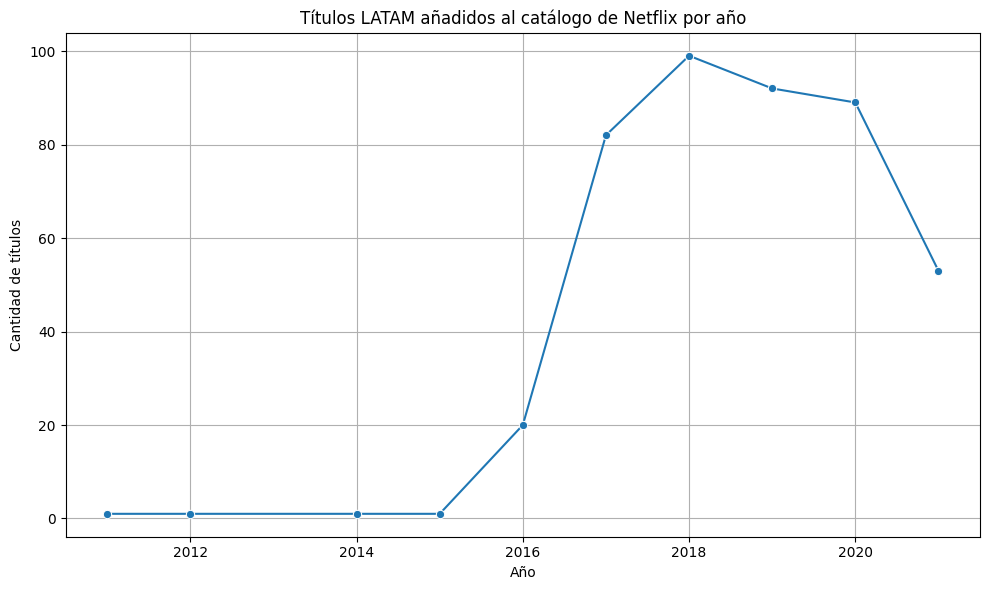

In [ ]:
# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
plt.title('Títulos LATAM añadidos al catálogo de Netflix por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
release_counts = df_latam['release_year'].value_counts().sort_index()

In [ ]:
release_counts

,count
release_year,
1979,1
1985,2
1990,1
1991,1
1992,1
1993,2
1994,1
1998,2
1999,2


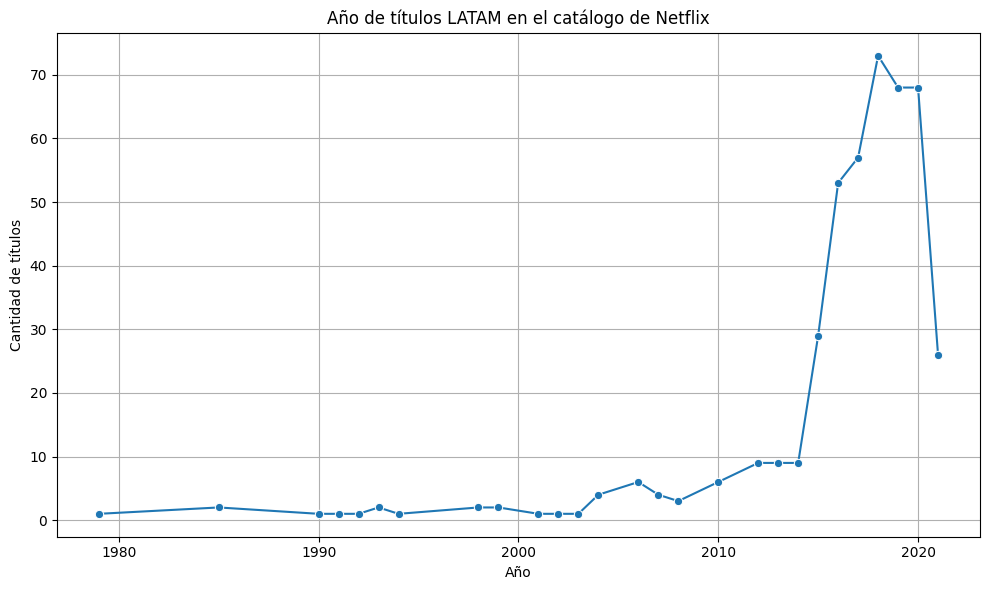

In [ ]:
# Graficar
plt.figure(figsize=(10,6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title('Año de títulos LATAM en el catálogo de Netflix')
plt.xlabel('Año')
plt.ylabel('Cantidad de títulos')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Conteo de géneros
genre_counts = Counter()

for genres in df_latam['listed_in'].dropna():
    for genre in genres.split(', '):
        genre_counts[genre] += 1

# Convertir a DataFrame
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=True)

genre_df


,count
Teen TV Shows,1
Movies,1
Cult Movies,2
Classic Movies,2
TV Sci-Fi & Fantasy,3
Science & Nature TV,3
Stand-Up Comedy & Talk Shows,3
Classic & Cult TV,3
TV Horror,3
Faith & Spirituality,5


<ipython-input-42-e02da216ea04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df['count'], y=genre_df.index, palette='rocket')


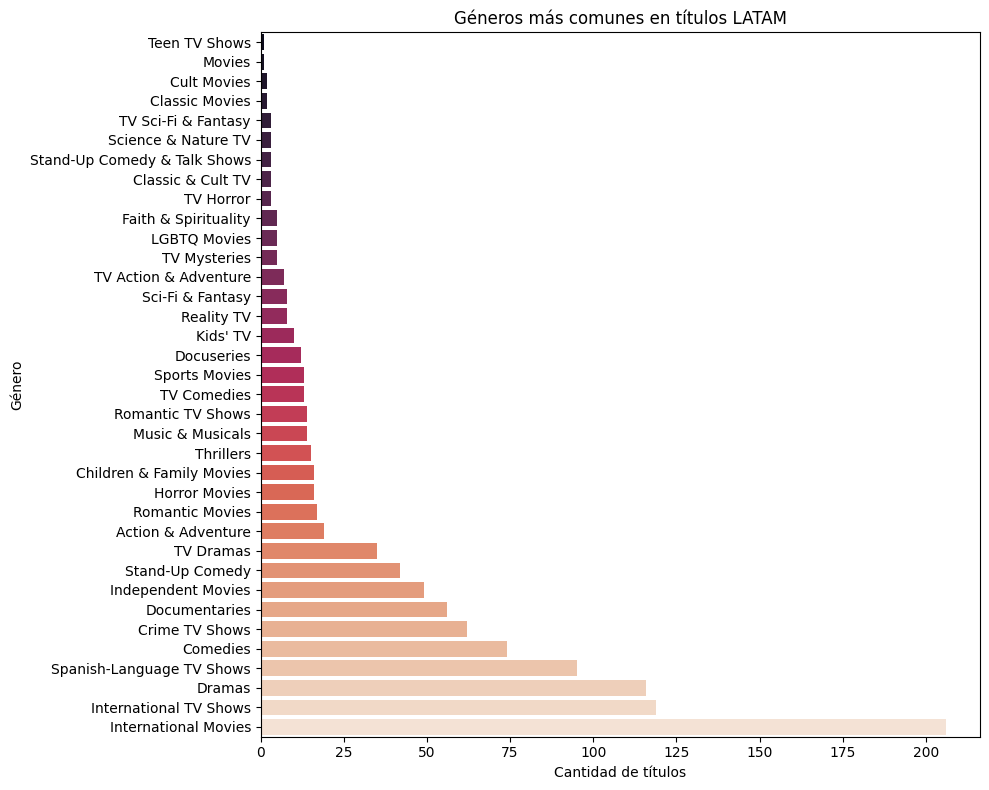

In [ ]:
  plt.figure(figsize=(10,8))
sns.barplot(x=genre_df['count'], y=genre_df.index, palette='rocket')
plt.title('Géneros más comunes en títulos LATAM')
plt.xlabel('Cantidad de títulos')
plt.ylabel('Género')
plt.tight_layout()
plt.show()


In [ ]:
df_latam['month_added'] = df_latam['date_added'].dt.month
df_latam['month_name'] = df_latam['date_added'].dt.strftime('%B')

In [ ]:
month_counts = df_latam['month_name'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
month_counts

,count
month_name,
January,42
February,33
March,25
April,41
May,39
June,47
July,24
August,52
September,25


In [ ]:
month_counts.sum()

np.int64(439)

<ipython-input-48-c5787773f7d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='magma')


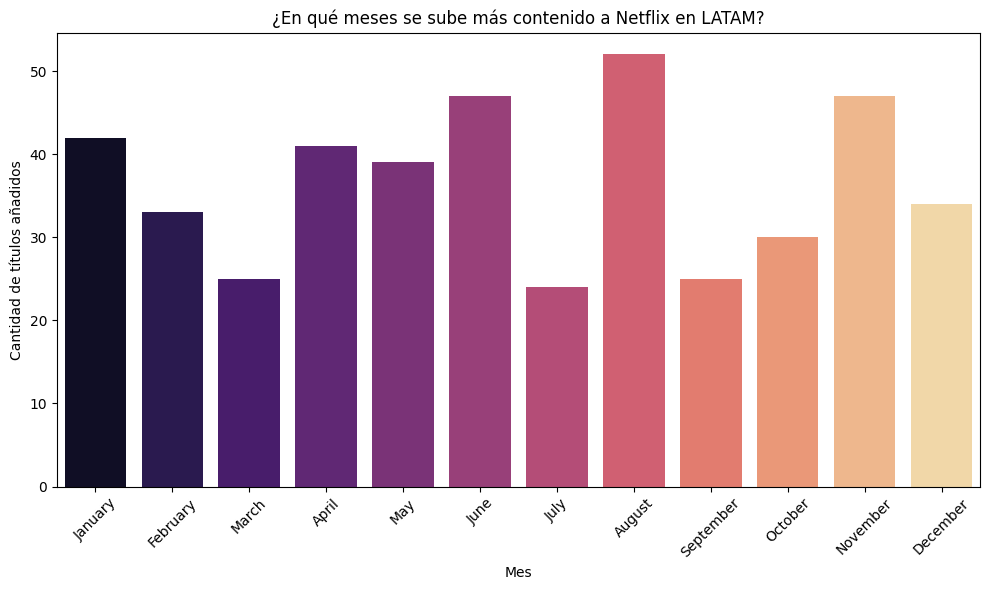

In [ ]:
# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='magma')
plt.title('¿En qué meses se sube más contenido a Netflix en LATAM?')
plt.xlabel('Mes')
plt.ylabel('Cantidad de títulos añadidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

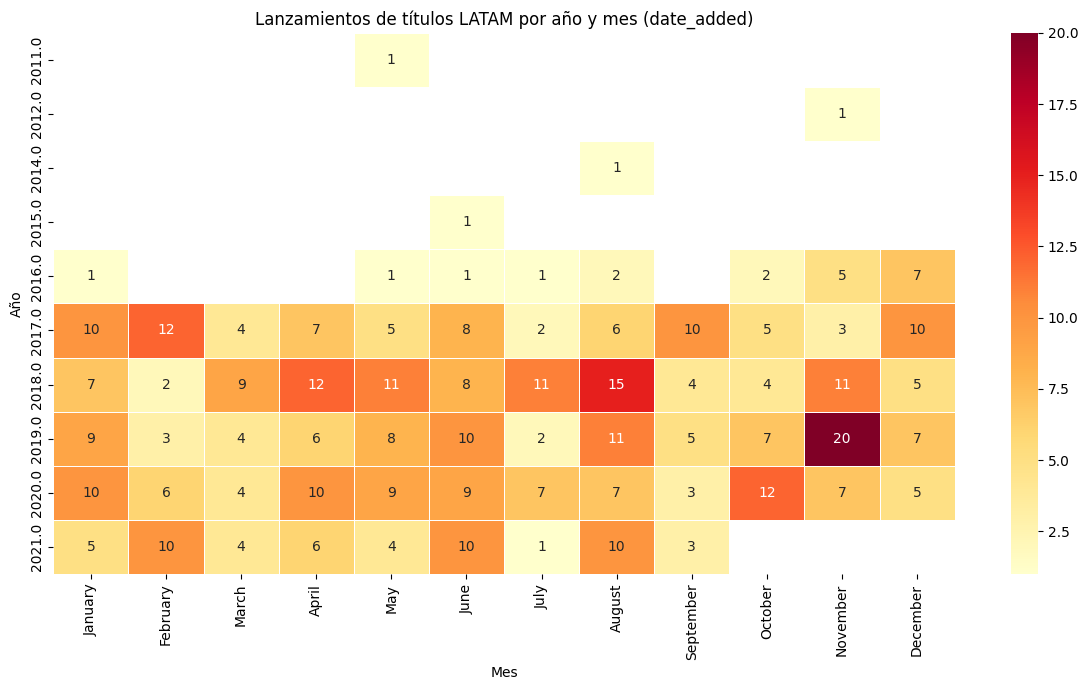

In [ ]:
# Extraer año y mes
df_latam['year'] = df_latam['date_added'].dt.year
df_latam['month'] = df_latam['date_added'].dt.month_name()

# Tabla cruzada año vs mes
heatmap_data = df_latam.pivot_table(index='year',
                                    columns='month',
                                    values='show_id',
                                    aggfunc='count')

# Reordenar columnas (meses)
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
heatmap_data = heatmap_data[months_order]

# Visualización
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5)
plt.title("Lanzamientos de títulos LATAM por año y mes (date_added)")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.tight_layout()
plt.show()

In [ ]:
def count_latam_countries(country_field):
    if pd.isnull(country_field):
        return 0
    countries = [c.strip() for c in country_field.split(',')]
    return sum(1 for c in countries if c in latam_countries)

# Nueva columna: cuántos países LATAM tiene el título
df['latam_country_count'] = df['country'].apply(count_latam_countries)


In [ ]:
# Filtrar los que tienen al menos un país LATAM
df_latam_presence = df[df['latam_country_count'] > 0]

# Ordenar por mayor número de países LATAM
top_titles_latam_presence = df_latam_presence[['title', 'country', 'latam_country_count']] \
                            .sort_values(by='latam_country_count', ascending=False)

# Mostrar los top 10 títulos
top_titles_latam_presence.head(20)

,title,country,latam_country_count
7362,Lusers,"Argentina, Chile, Peru",3
7577,Neruda,"Chile, Argentina, France, Spain, United States",2
1261,Fuga,"Argentina, Chile",2
1266,Tony Manero,"Chile, Brazil",2
7692,Pablo Escobar: Angel or Demon?,"Venezuela, Colombia",2
8021,Sin senos no hay paraíso,"Colombia, Mexico, United States",2
7258,La Viuda Negra,"Colombia, Mexico, United States",2
6170,Another Forever,"Brazil, Netherlands, United States, Colombia, ...",2
6233,Barbecue,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2
5605,The Memory of Water,"Chile, Spain, Argentina, Germany",2


In [ ]:
# Combinar todos los títulos en una sola lista de palabras
all_titles = ' '.join(df_latam['title'].dropna().tolist())

# Normalizar: minúsculas y quitar puntuación
all_titles_clean = re.sub(r'[^a-zA-ZáéíóúñüÁÉÍÓÚÑÜ\s]', '', all_titles.lower())

# Separar en palabras individuales
words = all_titles_clean.split()

# Palabras vacías en español e inglés
stopwords = set([
    'la', 'el', 'de', 'del', 'los', 'las', 'a', 'una', 'un', 'en', 'y', 'con',
    'the', 'of', 'and', 'in', 'to', 'for', 'by', 'on', 'por', 'al', 'se',
    'que', 'como', 'es', 'su', 'más', 'sin', 'mi', 'tu', 'sus', 'all', 'hay', 'one', 'get', 'another'
])

# Filtrar palabras vacías que puedan quedar (eliminar strings menores a dos caracteres)
filtered_words = [word for word in words if word not in stopwords and len(word) > 2]

In [ ]:
# Contar frecuencia de palabras
word_counts = Counter(filtered_words)

# Ver las 20 más comunes
word_counts.most_common(20)


[('love', 8),
 ('life', 7),
 ('paraíso', 5),
 ('world', 5),
 ('club', 5),
 ('last', 5),
 ('queen', 4),
 ('neto', 4),
 ('especial', 4),
 ('city', 3),
 ('series', 3),
 ('senos', 3),
 ('pablo', 3),
 ('escobar', 3),
 ('mexico', 3),
 ('christmas', 3),
 ('dark', 3),
 ('brazil', 3),
 ('luccas', 3),
 ('nothing', 3)]

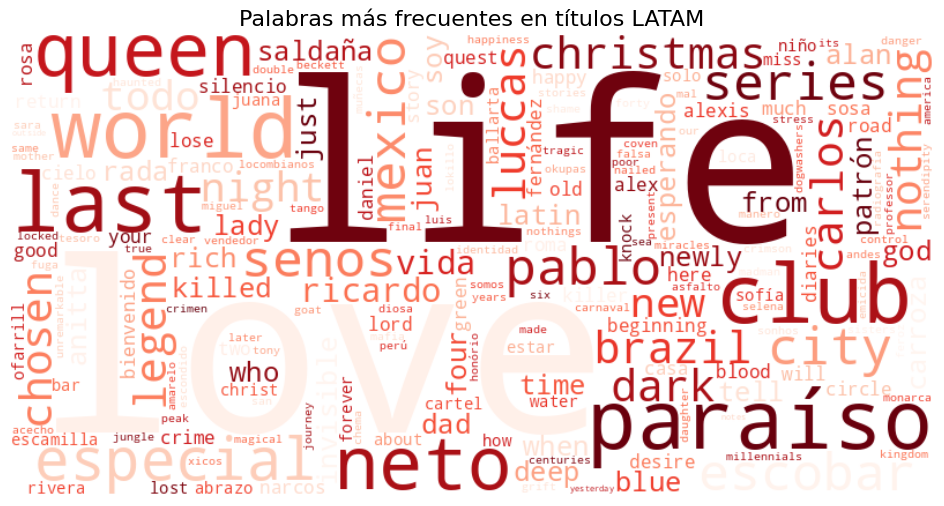

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Reds').generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en títulos LATAM', fontsize=16)
plt.show()